In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [164]:
df=pd.read_csv('Car_Prise2.csv')
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,Variant,City
0,0,2009,Toyota,Camry,"99,864",1st Owner,Petrol,"₹3,07,299",Automatic,W4 AT Automatic,Mumbai
1,1,2016,Maruti,Baleno,"50,022",1st Owner,Petrol,"₹5,32,199",Manual,ZETA 1.2 K12 Manual,Mumbai
2,2,2020,Skoda,Rapid,"6,981",1st Owner,Petrol,"₹9,01,299",Manual,1.0 AMBITION TSI MT Manual,Mumbai
3,3,2018,Hyundai,Creta,"48,945",3rd Owner,Diesel,"₹9,09,099",Manual,1.4 E PLUS CRDI Manual,Mumbai
4,4,2020,Hyundai,VENUE,547,1st Owner,Petrol,"₹8,26,399",Manual,S MT 1.2 KAPPA Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
4054,4054,2015,Maruti,Swift Dzire,"65,774",2nd Owner,Petrol,"₹4,56,599",Manual,VXI 1.2 BS IV Manual,Zirakpur
4055,4055,2016,Maruti,Celerio,"55,107",1st Owner,Petrol,"₹3,96,299",Manual,VXI Manual,Zirakpur
4056,4056,2016,Maruti,Vitara Brezza,"90,783",2nd Owner,Diesel,"₹6,69,099",Manual,ZDI Manual,Zirakpur
4057,4057,2016,Hyundai,Elite i20,"25,697",1st Owner,Petrol,"₹5,48,199",Manual,SPORTZ 1.2 Manual,Zirakpur


In [165]:
df['company name'].value_counts()

Maruti        2269
Hyundai        812
Ford           244
Honda          189
Renault         96
Volkswagen      90
Toyota          77
Tata            74
Mahindra        45
KIA             33
MG              27
Skoda           21
Datsun          19
Jeep            14
Audi            13
BMW             12
Mercedes        10
Ssangyong        8
Nissan           3
Chevrolet        1
RENAULT          1
HYUNDAI          1
Name: company name, dtype: int64

In [166]:
df['company name']=df['company name'].str.replace('HYUNDAI','Hyundai')
df['company name']=df['company name'].str.replace('RENAULT','Renault')
df['company name'].value_counts()

Maruti        2269
Hyundai        813
Ford           244
Honda          189
Renault         97
Volkswagen      90
Toyota          77
Tata            74
Mahindra        45
KIA             33
MG              27
Skoda           21
Datsun          19
Jeep            14
Audi            13
BMW             12
Mercedes        10
Ssangyong        8
Nissan           3
Chevrolet        1
Name: company name, dtype: int64

In [167]:
df.drop('Variant',inplace=True,axis=1)

In [168]:
df.describe()

,Unnamed: 0,year
count,4059.0000,4059.000000
mean,2029.0000,2016.917467
std,1171.8767,2.295954
min,0.0000,2008.000000
25%,1014.5000,2016.000000
50%,2029.0000,2017.000000
75%,3043.5000,2019.000000
max,4058.0000,2021.000000


Here we have only one columns as int that is year. and we have oldest model of the year 2008 and latest model is 2021.

In [169]:
tabel=[]

for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(tabel,columns=['Features','Unique No','Values'])

,Features,Unique No,Values
0,Unnamed: 0,4059,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,year,14,"[2009, 2016, 2020, 2018, 2015, 2019, 2017, 201..."
2,company name,20,"[Toyota, Maruti, Skoda, Hyundai, Ford, Volkswa..."
3,car model,109,"[Camry, Baleno, Rapid, Creta, VENUE, Ecosport,..."
4,km driven,2058,"[99,864, 50,022, 6,981, 48,945, 547, 12,488, 3..."
5,ownership,4,"[1st Owner, 3rd Owner, 2nd Owner, 4th Owner]"
6,Fuel,4,"[Petrol, Diesel, Petrol + CNG, Petrol + LPG]"
7,Price,1827,"[₹3,07,299, ₹5,32,199, ₹9,01,299, ₹9,09,099, ₹..."
8,Transmission,2,"[Automatic, Manual, nan]"
9,City,30,"[Mumbai, New Delhi, Gurgaon, Pune, Bengaluru, ..."


In [170]:
df.isnull().sum()

Unnamed: 0       0
year             0
company name     0
car model        0
km driven        0
ownership        0
Fuel             0
Price            0
Transmission    90
City             0
dtype: int64

Transmission have 90 null values that will be replaces during Data Preprocessing part.

In [171]:
df['Price']=df['Price'].str.replace(',','')
df['km driven']=df['km driven'].str.replace(',','')

In [172]:
df['Price']=df['Price'].str.replace('₹','')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4059 non-null   int64 
 1   year          4059 non-null   int64 
 2   company name  4059 non-null   object
 3   car model     4059 non-null   object
 4   km driven     4059 non-null   object
 5   ownership     4059 non-null   object
 6   Fuel          4059 non-null   object
 7   Price         4059 non-null   object
 8   Transmission  3969 non-null   object
 9   City          4059 non-null   object
dtypes: int64(2), object(8)
memory usage: 317.2+ KB


In [174]:
df['km driven']=df['km driven'].astype('int64')
df['Price']=df['Price'].astype('int64')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4059 non-null   int64 
 1   year          4059 non-null   int64 
 2   company name  4059 non-null   object
 3   car model     4059 non-null   object
 4   km driven     4059 non-null   int64 
 5   ownership     4059 non-null   object
 6   Fuel          4059 non-null   object
 7   Price         4059 non-null   int64 
 8   Transmission  3969 non-null   object
 9   City          4059 non-null   object
dtypes: int64(4), object(6)
memory usage: 317.2+ KB


In [176]:
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,0,2009,Toyota,Camry,99864,1st Owner,Petrol,307299,Automatic,Mumbai
1,1,2016,Maruti,Baleno,50022,1st Owner,Petrol,532199,Manual,Mumbai
2,2,2020,Skoda,Rapid,6981,1st Owner,Petrol,901299,Manual,Mumbai
3,3,2018,Hyundai,Creta,48945,3rd Owner,Diesel,909099,Manual,Mumbai
4,4,2020,Hyundai,VENUE,547,1st Owner,Petrol,826399,Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...
4054,4054,2015,Maruti,Swift Dzire,65774,2nd Owner,Petrol,456599,Manual,Zirakpur
4055,4055,2016,Maruti,Celerio,55107,1st Owner,Petrol,396299,Manual,Zirakpur
4056,4056,2016,Maruti,Vitara Brezza,90783,2nd Owner,Diesel,669099,Manual,Zirakpur
4057,4057,2016,Hyundai,Elite i20,25697,1st Owner,Petrol,548199,Manual,Zirakpur


# Visualization

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

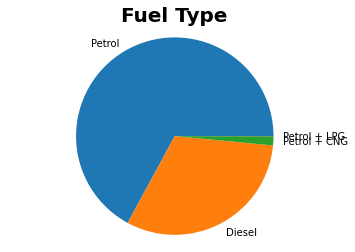

In [178]:
plt.pie(df['Fuel'].value_counts(),labels=df['Fuel'].value_counts().index)
plt.title('Fuel Type',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

Most of the cars are petrol based and very few car is petrol+CNG and petrol LPG based.

In [179]:
cat=[feature for feature in df.columns if df[feature].dtype=='O']
cat

['company name', 'car model', 'ownership', 'Fuel', 'Transmission', 'City']

In [180]:
col=['company name', 'ownership', 'Fuel', 'Transmission', 'City']

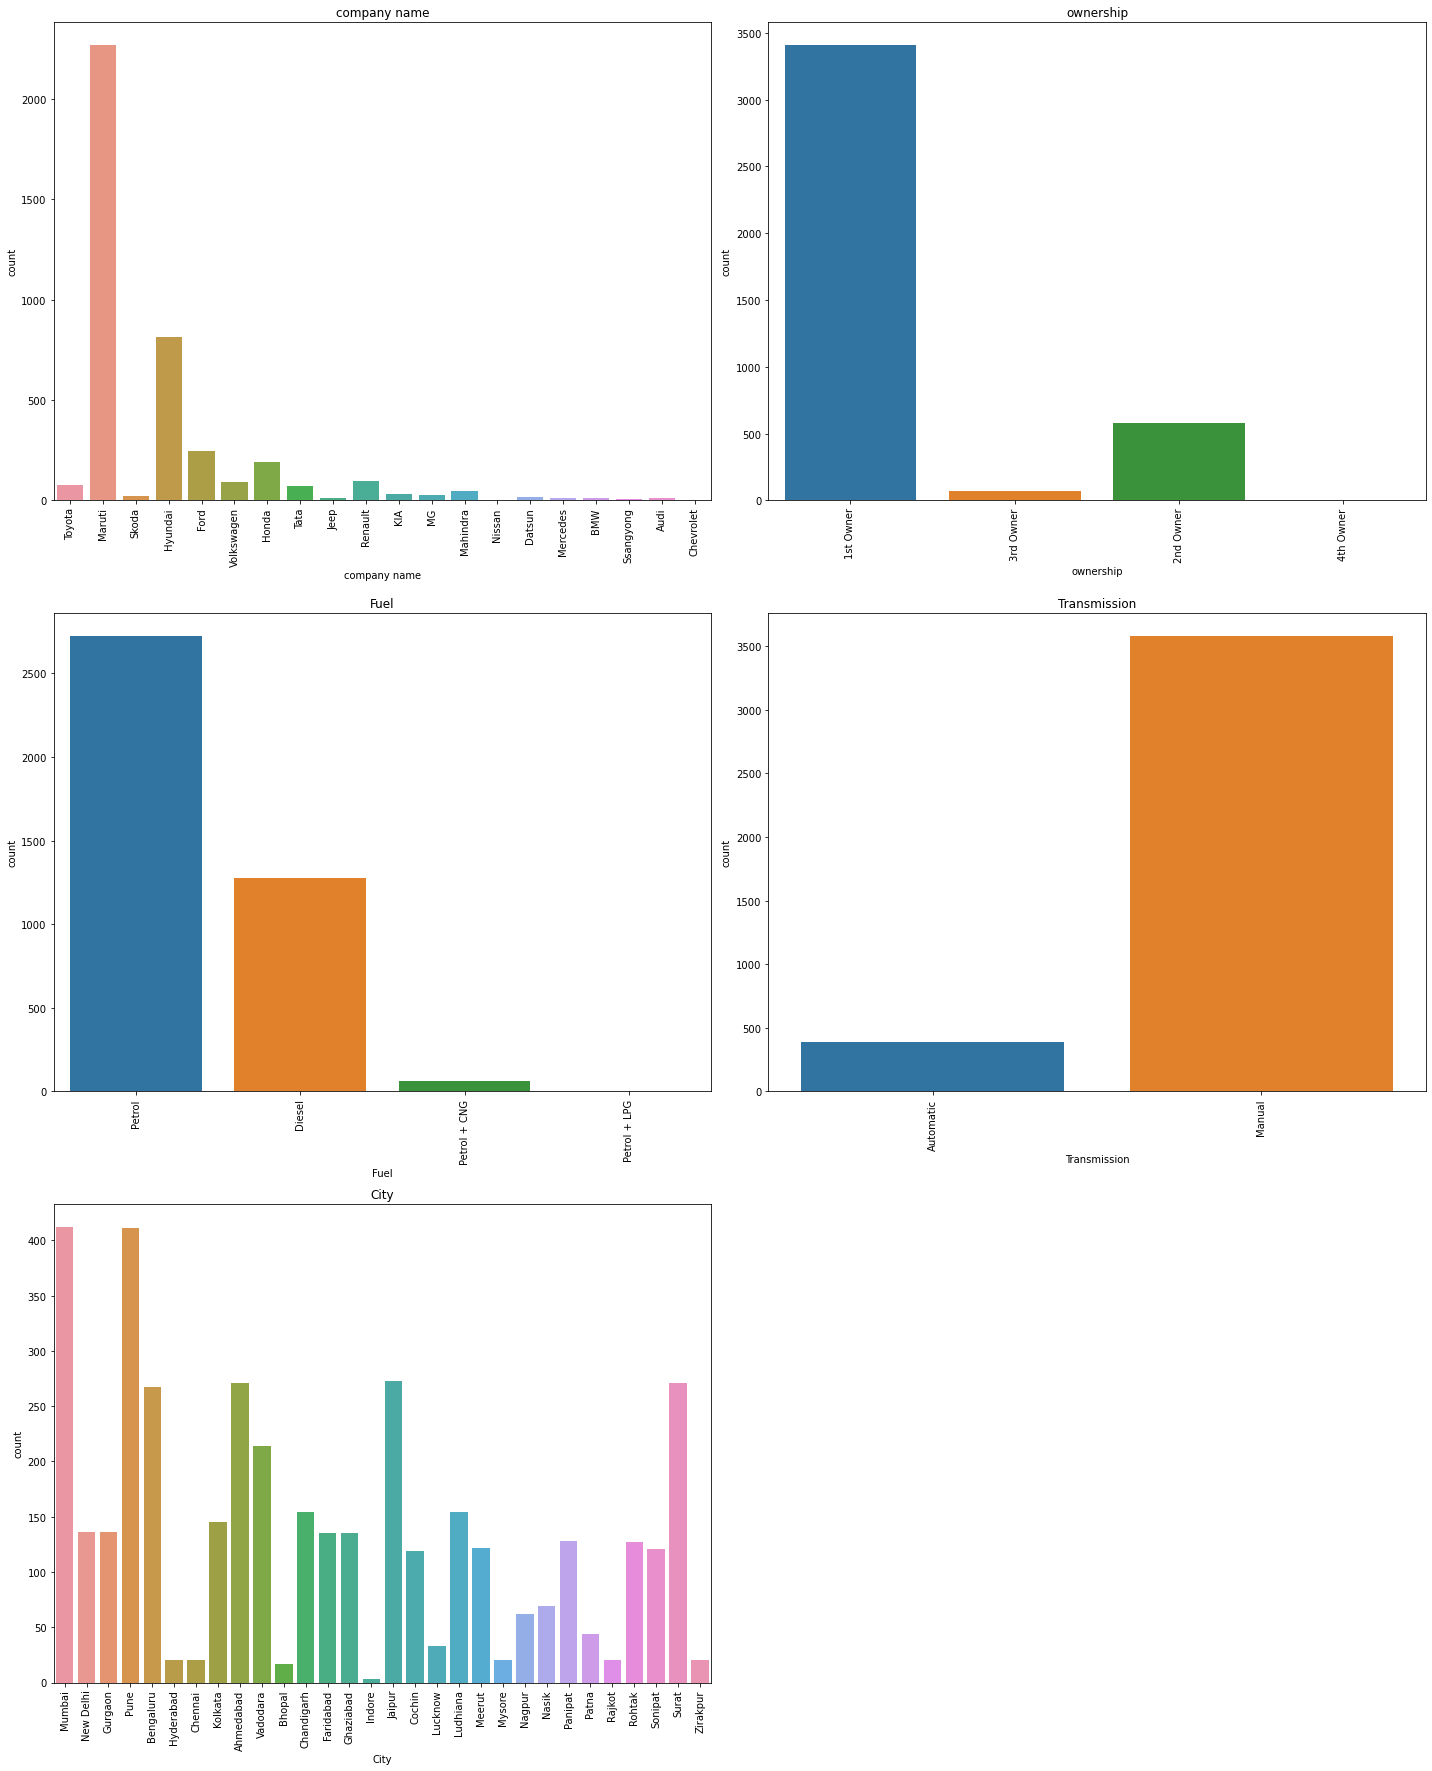

In [181]:
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.countplot(df[col[i]])
    plt.title(col[i])
    plt.xticks(rotation=90,fontsize=10)
    plt.tight_layout()

# Observation

1)Maruti having high count for sell as compair to otherbrans which means that people who used Maruti's car they sell it fot second Hand.
after Maruti, Honda and Hyundai are sell second hand.

2)Most of the cars are from the 1st owner and after that 2nd and 3rd owners.

3)Most of the people are prefere the petrol cars because they have low maintance cost as compair to Diesel and life of petrol car
is high than the Diesel car and some people use the Diesel car because they have good mileage.

4)Most os the cars are Manually Transmission and very fews are Automatic.because Automatic having high cost as compair to Manual

5)They are many people from Mumbai,Pune,Jaipur and Surat sell their car and from city like Rajkot,Chennai,Hydrabad ,Indore they are very less for selling the cars.

<AxesSubplot:xlabel='km driven', ylabel='Density'>

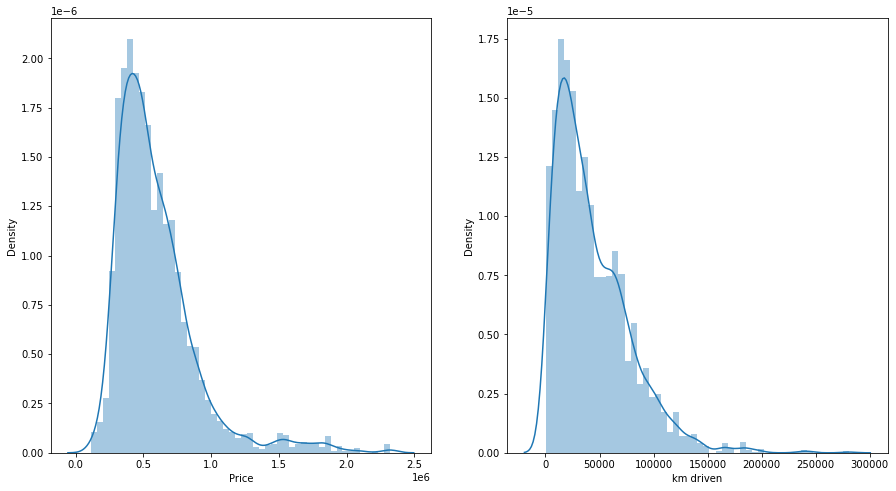

In [182]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(df['Price'])
plt.subplot(1,2,2)
sns.distplot(df['km driven'])


From this chart we can see that Both Price and Km Driven are skewed.

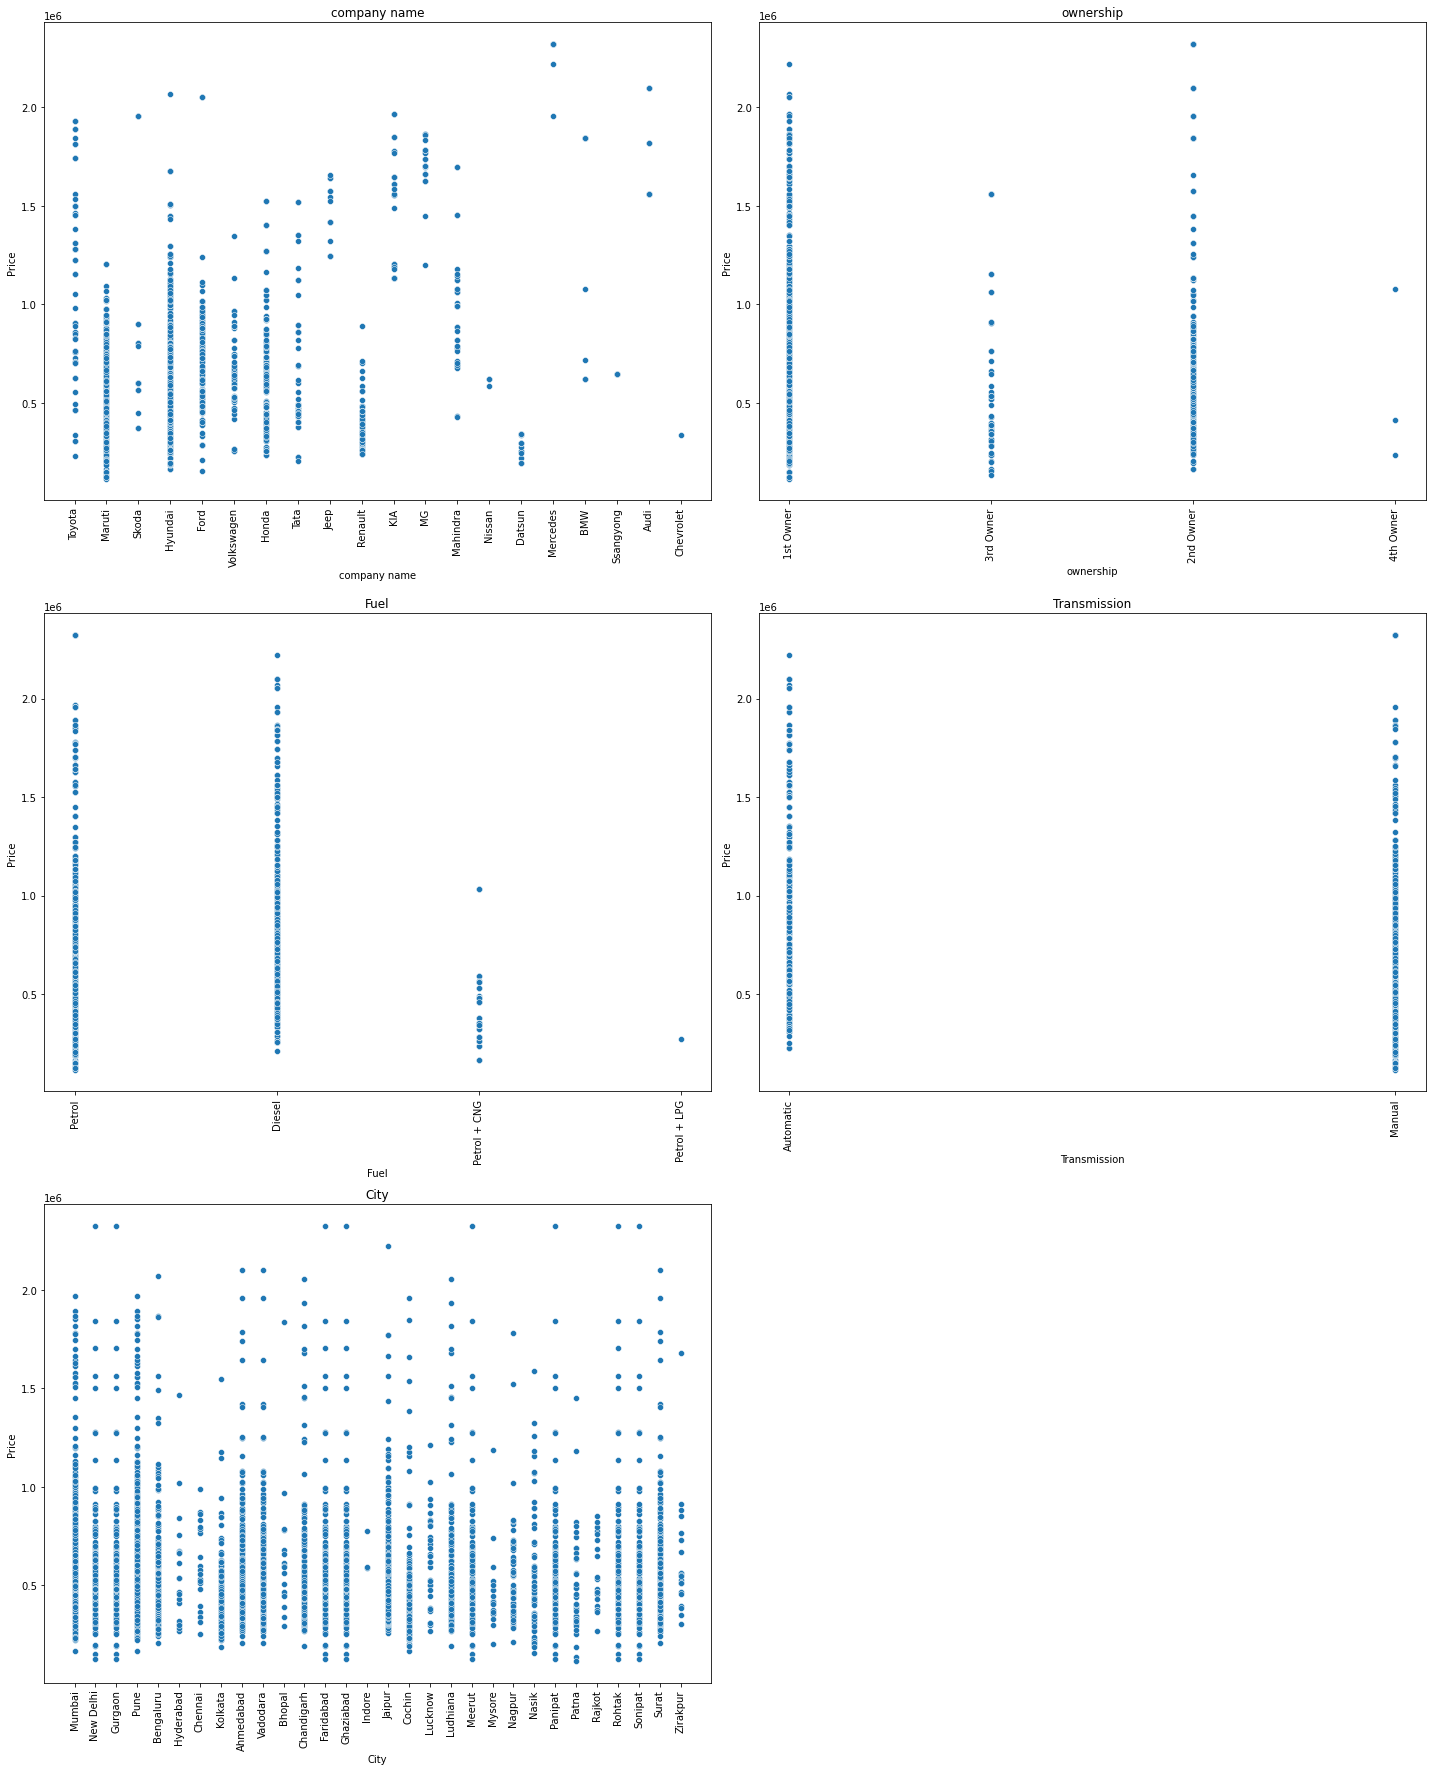

In [183]:
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df[col[i]],y=df['Price'])
    plt.title(col[i])
    plt.xticks(rotation=90,fontsize=10)
    plt.tight_layout()

# Observation

1)Company like BMW,Audi,Mercedes having high price after that Jeep ,KIA are coming for higher price.Maruti ,Toyota ,Honda and Tata 
having relatively low prices.

2) Price for the 1st owner is high and after than 2nd owner and follow by 3rd and 4th owner.because as the owner changes chances
of low milage and maintances cost will increases.

3)price for the petrol is high than petrol+LPG and Petrol+CNG

4) As we earily show that Mumbai,pune,Surat having high no. of car selling so price is also high for that city as compair to
other city like Hydrabad,Mysure,Chennai,Rajkot.

(array([   0., 2000., 4000.]), [])

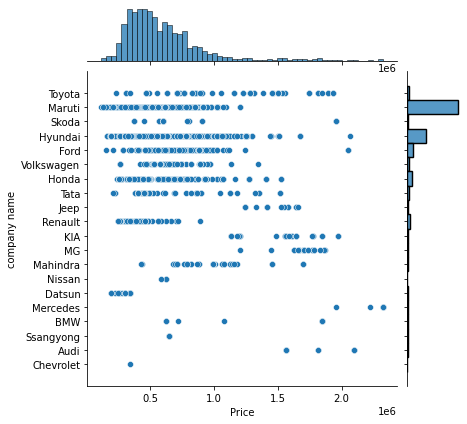

In [184]:
sns.jointplot(y=df['company name'],x=df['Price'])
plt.xticks(rotation=90)

From these chart we can see that Price of the Maruti is low and volume of the Maruti car is high. and price for the Audi ,BMD
Mercedes is high and volume is too much low.

<AxesSubplot:xlabel='Price', ylabel='car model'>

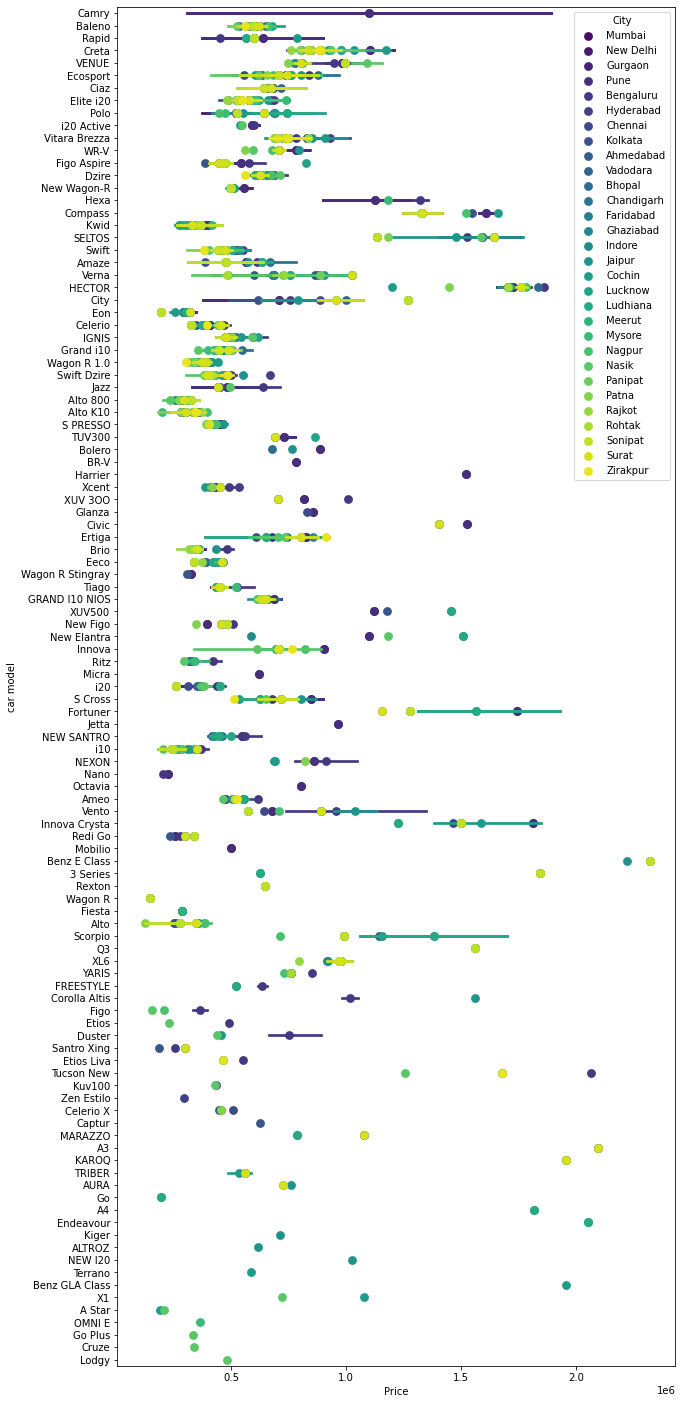

In [185]:
plt.figure(figsize=(10,25))
sns.pointplot(y=df['car model'],x=df['Price'],hue=df['City'],palette='viridis',join=False)

In [ ]:
sns.distplot(df[])

Text(0.5, 1.0, 'FUEL VS SELL')

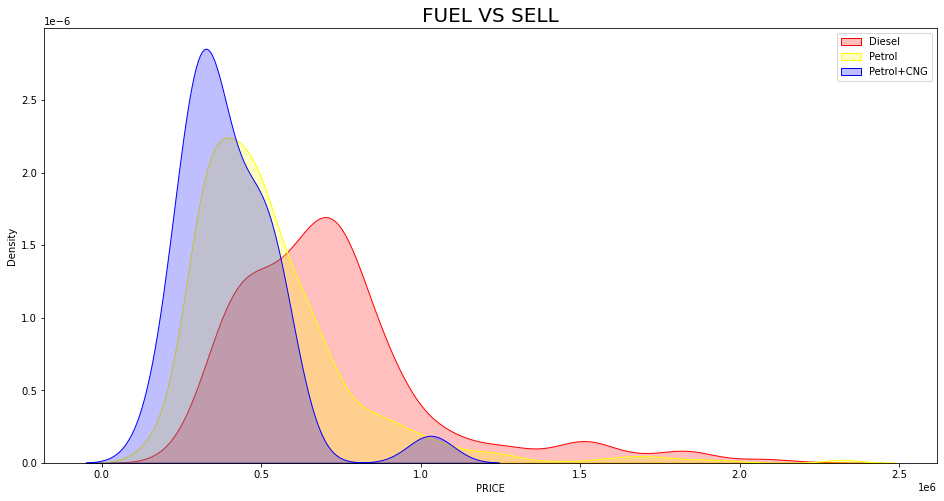

In [193]:
plt.figure(figsize=(16,8))
a1=sns.kdeplot(df[df['Fuel']=='Diesel']['Price'],shade=True,color='red')
a1=sns.kdeplot(df[df['Fuel']=='Petrol']['Price'],shade=True,color='Yellow')
a1=sns.kdeplot(df[df['Fuel']=='Petrol + CNG']['Price'],shade=True,color='Blue')
a1=sns.kdeplot(df[df['Fuel']=='Petrol + LPG']['Price'])
plt.legend('upper right',labels=['Diesel','Petrol','Petrol+CNG','Petrol+LPG'])
plt.xlabel("PRICE")
plt.title("FUEL VS SELL",fontsize=20)

From this chart we can see that price of Petrol+CNG is less than the Diesel price and Petrol car price is high among all these.

<AxesSubplot:xlabel='year', ylabel='Price'>

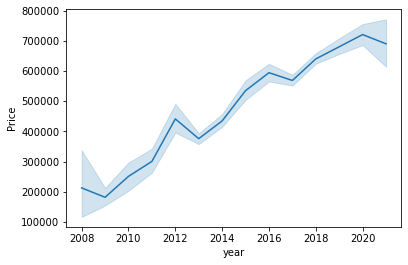

In [196]:
sns.lineplot(x=df['year'],y=df['Price'])

From this chart we clearly see that as car becomes old price is decreases.

# Data PreProcessing

In [26]:
df

,Unnamed: 0,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,0,2009,Toyota,Camry,99864,1st Owner,Petrol,307299,Automatic,Mumbai
1,1,2016,Maruti,Baleno,50022,1st Owner,Petrol,532199,Manual,Mumbai
2,2,2020,Skoda,Rapid,6981,1st Owner,Petrol,901299,Manual,Mumbai
3,3,2018,Hyundai,Creta,48945,3rd Owner,Diesel,909099,Manual,Mumbai
4,4,2020,Hyundai,VENUE,547,1st Owner,Petrol,826399,Manual,Mumbai
...,...,...,...,...,...,...,...,...,...,...
4054,4054,2015,Maruti,Swift Dzire,65774,2nd Owner,Petrol,456599,Manual,Zirakpur
4055,4055,2016,Maruti,Celerio,55107,1st Owner,Petrol,396299,Manual,Zirakpur
4056,4056,2016,Maruti,Vitara Brezza,90783,2nd Owner,Diesel,669099,Manual,Zirakpur
4057,4057,2016,Hyundai,Elite i20,25697,1st Owner,Petrol,548199,Manual,Zirakpur


In [27]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# Label Encoding

In [28]:
from sklearn.preprocessing  import LabelEncoder

In [29]:
lb=LabelEncoder()

In [30]:
for i in cat:
    df[i]=lb.fit_transform(df[i])

In [31]:
df

,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
0,2009,18,17,99864,0,1,307299,0,16
1,2016,11,12,50022,0,1,532199,1,16
2,2020,15,75,6981,0,1,901299,1,16
3,2018,6,26,48945,2,0,909099,1,16
4,2020,6,91,547,0,1,826399,1,16
...,...,...,...,...,...,...,...,...,...
4054,2015,11,85,65774,1,1,456599,1,29
4055,2016,11,19,55107,0,1,396299,1,29
4056,2016,11,94,90783,1,0,669099,1,29
4057,2016,6,32,25697,0,1,548199,1,29


<AxesSubplot:>

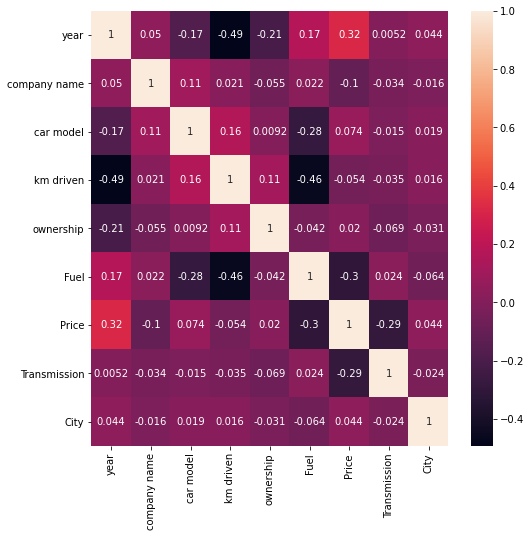

In [32]:
plt.figure(figsize=(8,8))
corr=df.corr()
sns.heatmap(data=corr,annot=True)

# Data Cleaning

checking outliers

In [33]:
df.shape

(4059, 9)

In [34]:
from scipy.stats import zscore

In [35]:
z=abs(zscore(df))

In [36]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    5,   21,   27,   32,   32,   35,   43,   46,   90,
         94,   98,  104,  113,  127,  135,  139,  151,  162,  162,  174,
        181,  194,  203,  208,  217,  220,  221,  234,  238,  238,  248,
        260,  260,  272,  276,  277,  294,  311,  329,  331,  337,  355,
        355,  365,  371,  389,  401,  417,  425,  453,  457,  464,  476,
        476,  485,  500,  505,  539,  553,  561,  589,  593,  600,  612,
        612,  621,  636,  641,  675,  684,  694,  699,  708,  711,  712,
        725,  729,  729,  739,  751,  751,  763,  767,  768,  785,  802,
        820,  822,  828,  845,  845,  855,  861,  879,  891,  902,  905,
        907,  923,  929,  934,  934,  937,  945,  948,  992,  996, 1000,
       1006, 1015, 1029, 1037, 1041, 1053, 1064, 1064, 1075, 1082, 1110,
       1113, 1117, 1122, 1131, 1141, 1142, 1158, 1162, 1162, 1163, 1167,
       1190, 1195, 1231, 1232, 1243, 1257, 1268, 1269, 1273, 1298, 1314,
       1323, 1362, 1373, 1378, 1393, 1519, 1572, 1

In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new.shape

(3741, 9)

In [39]:
dataloss=(4059-3741)/100
dataloss

3.18

In [40]:
df=df_new

skewness check

In [41]:
df.skew()

year           -0.588147
company name    0.243800
car model       0.188102
km driven       0.897697
ownership       2.024787
Fuel           -0.539521
Price           1.110271
Transmission   -3.002143
City           -0.136793
dtype: float64

skewness removing

In [42]:
df['km driven']=np.sqrt(df['km driven'])
df['Price']=np.sqrt(df['Price'])

In [43]:
df

,year,company name,car model,km driven,ownership,Fuel,Price,Transmission,City
1,2016,11,12,223.655986,0,1,729.519705,1,16
2,2020,15,75,83.552379,0,1,949.367684,1,16
4,2020,6,91,23.388031,0,1,909.064904,1,16
6,2018,11,21,176.073848,0,1,899.110116,0,16
7,2015,6,32,323.939809,0,0,686.657848,1,16
...,...,...,...,...,...,...,...,...,...
4054,2015,11,85,256.464422,1,1,675.721096,1,29
4055,2016,11,19,234.748802,0,1,629.522835,1,29
4056,2016,11,94,301.302174,1,0,817.984719,1,29
4057,2016,6,32,160.302838,0,1,740.404619,1,29


In [44]:
y=df['Price']


In [45]:
x=df.drop('Price',axis=1,inplace=True)
x

In [46]:
x=df

In [47]:
x

,year,company name,car model,km driven,ownership,Fuel,Transmission,City
1,2016,11,12,223.655986,0,1,1,16
2,2020,15,75,83.552379,0,1,1,16
4,2020,6,91,23.388031,0,1,1,16
6,2018,11,21,176.073848,0,1,0,16
7,2015,6,32,323.939809,0,0,1,16
...,...,...,...,...,...,...,...,...
4054,2015,11,85,256.464422,1,1,1,29
4055,2016,11,19,234.748802,0,1,1,29
4056,2016,11,94,301.302174,1,0,1,29
4057,2016,6,32,160.302838,0,1,1,29


# StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
std=StandardScaler()

In [50]:
X=std.fit_transform(x)

# Apply Models

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,np.log(y),random_state=42,test_size=0.30)

In [53]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Taining Score:-',ln.score(x_train,y_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)
print("Test Score",ln.score(x_test,y_test)*100)

Taining Score:- 44.41397946022854
Mean Absolute Error 0.11419777842167722
Mean Squared Error 0.02070803487867462
Root Mean Squared Erro 0.14390286612390532
R2 Score 44.20661143528055
Test Score 44.20661143528055


In [54]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt

In [55]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [56]:
kf=KFold(n_splits=5,shuffle=True)
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    predt=f.predict(x_train)
    print('----',f,'----')
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
    print('Cross Validation Score',cross_val_score(f,x,y,cv=kf).mean()*100)
    r2=r2_score(y_test,pred)
    print('R2 Score',r2_score(y_test,pred))
    print("Test Score",f.score(x_test,y_test)*100)
    print('Model Peformance Cure')
    skplt.estimators.plot_learning_curve(f,X,y,cv=kf,scoring='r2',text_fontsize='large')
    plt.show()

---- SVR() ----
Taining Score:- 71.79391217688492
Mean Absolute Error 0.08957885931371484
Mean Squared Error 0.012648244906581205
Root Mean Squared Error 0.1124644161794352
Cross Validation Score -1.8094094869409494
R2 Score 0.659219985445676
Test Score 65.9219985445676
Model Peformance Cure


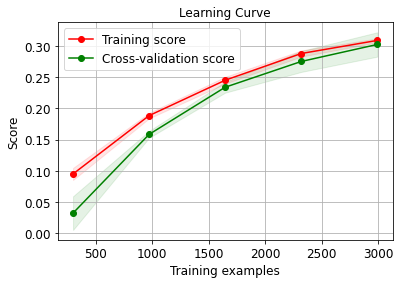

In [57]:
fun(svr)

---- SVR(kernel='linear') ----
Taining Score:- 44.13935171525243
Mean Absolute Error 0.11452082536994773
Mean Squared Error 0.020920109089062278
Root Mean Squared Error 0.14463785496564266
Cross Validation Score 39.15850294416722
R2 Score 0.43635222653387984
Test Score 43.635222653387984
Model Peformance Cure


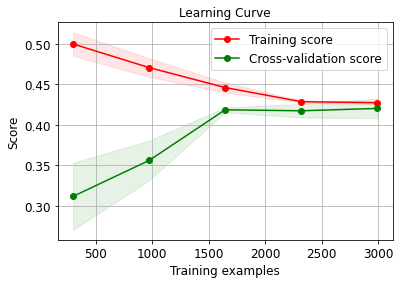

In [58]:
fun(svrl)

---- SVR(kernel='poly') ----
Taining Score:- 60.230158999897235
Mean Absolute Error 0.10106501972134872
Mean Squared Error 0.017139922984516016
Root Mean Squared Error 0.13091952865984516
Cross Validation Score -1.6366963533777665
R2 Score 0.5382012882210898
Test Score 53.820128822108984
Model Peformance Cure


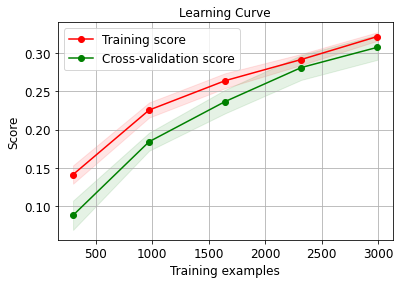

In [59]:
fun(svrp)

---- DecisionTreeRegressor() ----
Taining Score:- 99.99988652114867
Mean Absolute Error 0.035820435716716316
Mean Squared Error 0.0054509146065219805
Root Mean Squared Error 0.07383030953830534
Cross Validation Score 89.53257456084147
R2 Score 0.8531367179664271
Test Score 85.31367179664271
Model Peformance Cure


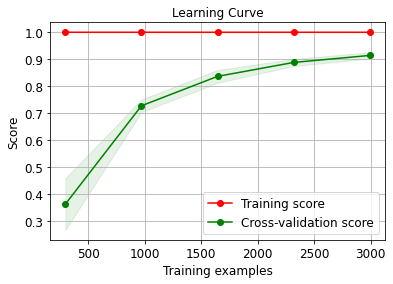

In [60]:
fun(dtc)

---- KNeighborsRegressor() ----
Taining Score:- 76.87532701288806
Mean Absolute Error 0.08320717487404061
Mean Squared Error 0.013458258954970968
Root Mean Squared Error 0.11600973646625945
Cross Validation Score 46.82878125005118
R2 Score 0.6373958824781691
Test Score 63.73958824781691
Model Peformance Cure


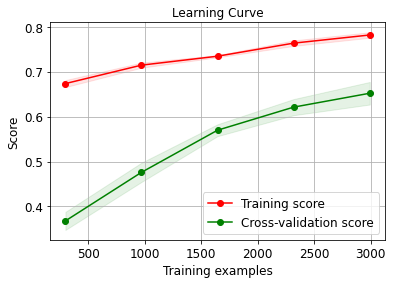

In [61]:
fun(knn)

# Regulization

In [62]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [63]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

---- Lasso() ----
Taining Score:- 0.0
Mean Absolute Error 0.15727293540727327
Mean Squared Error 0.037165133045100274
Root Mean Squared Error 0.19278260566010688
Cross Validation Score 42.727333053551945
R2 Score -0.0013353373188300655
Test Score -0.13353373188300655
Model Peformance Cure


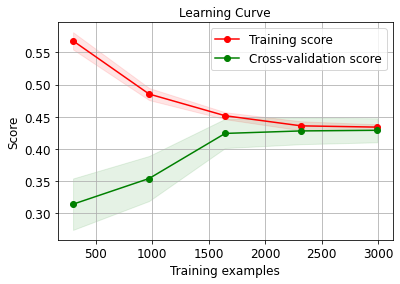

In [64]:
fun(ls)

---- Ridge() ----
Taining Score:- 44.41396975214447
Mean Absolute Error 0.11419803191336633
Mean Squared Error 0.020707713494861904
Root Mean Squared Error 0.14390174945031733
Cross Validation Score 43.029187366949024
R2 Score 0.4420747733549978
Test Score 44.20747733549978
Model Peformance Cure


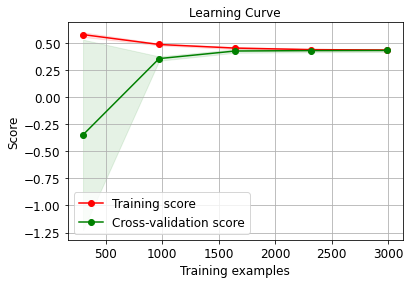

In [65]:
fun(rd)

---- ElasticNet() ----
Taining Score:- 0.0
Mean Absolute Error 0.15727293540727327
Mean Squared Error 0.037165133045100274
Root Mean Squared Error 0.19278260566010688
Cross Validation Score 31.078878035880386
R2 Score -0.0013353373188300655
Test Score -0.13353373188300655
Model Peformance Cure


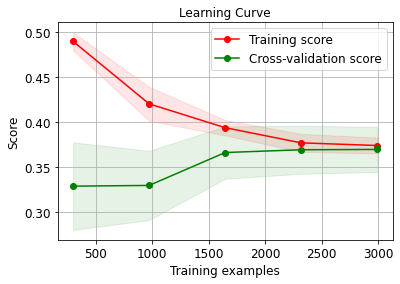

In [66]:
fun(es)

# Ensemble Methods

In [67]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor

In [68]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()
bg=BaggingRegressor()
lgbm=LGBMRegressor()

---- RandomForestRegressor() ----
Taining Score:- 98.9407519478612
Mean Absolute Error 0.03211258324645793
Mean Squared Error 0.0032438379053951485
Root Mean Squared Error 0.056954700467960924
Cross Validation Score 92.97750257875744
R2 Score 0.9126016979606996
Test Score 91.26016979606996
Model Peformance Cure


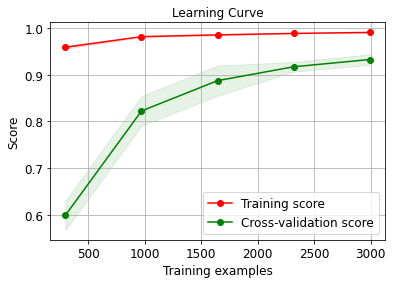

In [69]:
fun(rf)

---- AdaBoostRegressor() ----
Taining Score:- 60.977569139941245
Mean Absolute Error 0.09932022664934187
Mean Squared Error 0.014653735993148707
Root Mean Squared Error 0.12105261663073916
Cross Validation Score 52.59212553416124
R2 Score 0.6051863003995053
Test Score 60.51863003995053
Model Peformance Cure


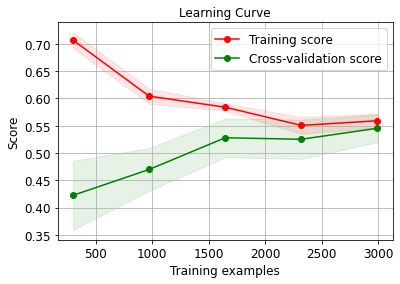

In [70]:
fun(ad)

---- GradientBoostingRegressor() ----
Taining Score:- 86.54615843619666
Mean Absolute Error 0.055749039267940184
Mean Squared Error 0.0056498063212469
Root Mean Squared Error 0.07516519354892197
Cross Validation Score 83.6036994461788
R2 Score 0.8477780044105703
Test Score 84.77780044105702
Model Peformance Cure


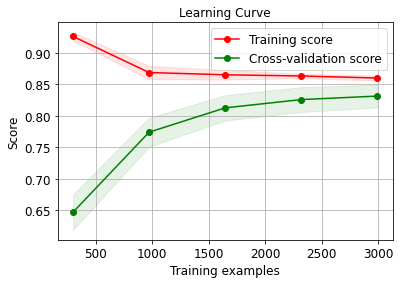

In [71]:
fun(gd)

---- BaggingRegressor() ----
Taining Score:- 98.37276178119609
Mean Absolute Error 0.034652376016837225
Mean Squared Error 0.0038096402517152307
Root Mean Squared Error 0.061722283267189905
Cross Validation Score 91.96356543669074
R2 Score 0.8973573590632529
Test Score 89.73573590632529
Model Peformance Cure


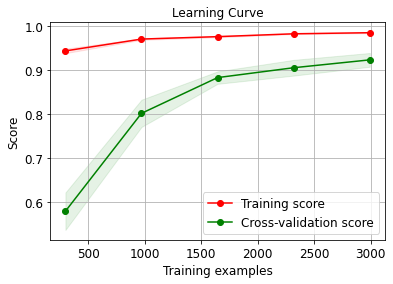

In [73]:
fun(bg)

---- LGBMRegressor() ----
Taining Score:- 95.98154191242871
Mean Absolute Error 0.038244393180943255
Mean Squared Error 0.0034410567325763803
Root Mean Squared Error 0.05866052107317476
Cross Validation Score 91.83692419265212
R2 Score 0.9072880567959688
Test Score 90.72880567959687
Model Peformance Cure


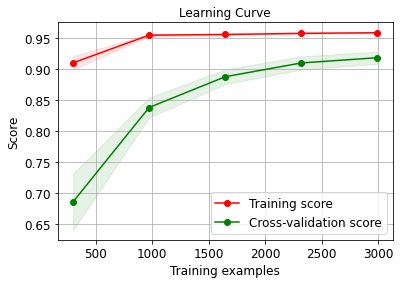

In [74]:
fun(lgbm)

# Hyper Parameter Tunning For Best Score

In [75]:
from sklearn.model_selection import GridSearchCV

In [125]:
p1={'n_estimators':[100,150,250,500],'max_depth':[3,5,7,9,11],'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3,4,5],'max_features':['auto','log2','sqrt']}

In [126]:
g1=GridSearchCV(rf,p1)
g1.fit(x,y)
print(g1.best_params_)

{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [149]:
rfr1=RandomForestRegressor(max_depth=17,max_features='auto',min_samples_leaf=1,n_estimators=150,min_samples_split=2)

---- RandomForestRegressor(max_depth=17, n_estimators=150) ----
Taining Score:- 98.86998204959235
Mean Absolute Error 0.03226959883205686
Mean Squared Error 0.003079618914428019
Root Mean Squared Error 0.055494314253155874
Cross Validation Score 93.63241106131687
R2 Score 0.9170262288379248
Test Score 91.70262288379249
Model Peformance Cure


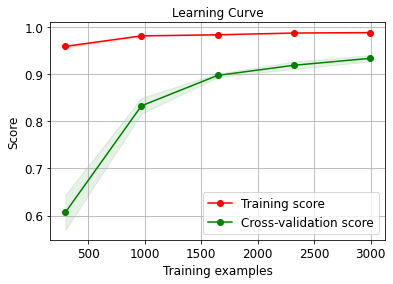

In [150]:
fun(rfr1)

# Feature Importance

In [151]:
feature_imp = pd.Series(rfr1.feature_importances_, index=df.columns).sort_values(ascending=False)
feature_imp

car model       0.465315
year            0.229437
company name    0.114342
Fuel            0.070382
km driven       0.058543
Transmission    0.035755
City            0.019135
ownership       0.007092
dtype: float64

<AxesSubplot:title={'center':'Important Features'}, ylabel='Name Of Features'>

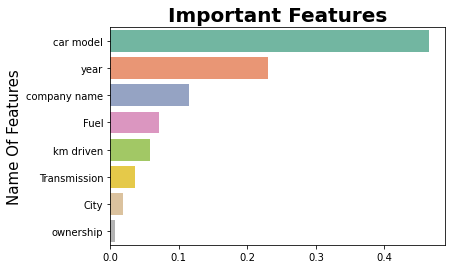

In [152]:
plt.title('Important Features',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel('Name Of Features',fontsize=15)
sns.barplot(x=feature_imp,y=feature_imp.index,palette='Set2')

From this chart we can see that Price is Depends more on car model ,year and company and dependency on city and ownership on price is very less.

[Text(230.6448391834431, 1070.2125, 'X[2] <= -1.215\nmse = 0.037\nsamples = 2618\nvalue = 6.582'),
 Text(61.7214397285939, 1036.2375, 'X[0] <= 0.239\nmse = 0.006\nsamples = 358\nvalue = 6.342'),
 Text(26.9679778612374, 1002.2625, 'X[0] <= -1.142\nmse = 0.005\nsamples = 163\nvalue = 6.3'),
 Text(11.40869908986997, 968.2875, 'X[2] <= -1.378\nmse = 0.01\nsamples = 33\nvalue = 6.239'),
 Text(10.94832283403663, 934.3125, 'mse = 0.0\nsamples = 1\nvalue = 6.672'),
 Text(11.86907534570331, 934.3125, 'X[7] <= 0.313\nmse = 0.004\nsamples = 32\nvalue = 6.226'),
 Text(7.624981737239702, 900.3375000000001, 'X[7] <= -1.231\nmse = 0.003\nsamples = 29\nvalue = 6.238'),
 Text(2.9924456629167135, 866.3625000000001, 'X[3] <= 1.469\nmse = 0.002\nsamples = 10\nvalue = 6.28'),
 Text(2.5320694070833727, 832.3875, 'X[0] <= -2.523\nmse = 0.002\nsamples = 9\nvalue = 6.27'),
 Text(2.0716931512500323, 798.4125, 'mse = 0.0\nsamples = 1\nvalue = 6.195'),
 Text(2.9924456629167135, 798.4125, 'X[4] <= 1.012\nmse = 0.0

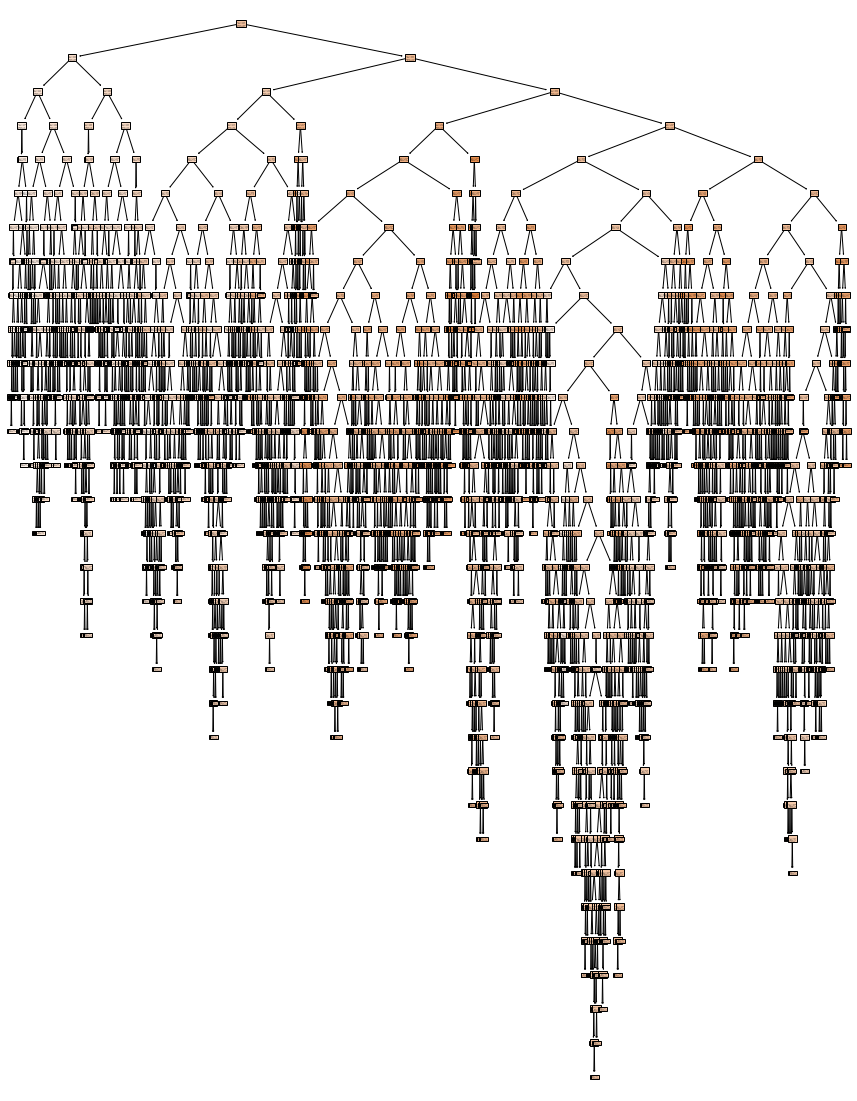

In [153]:
plt.figure(figsize=(15,20))
plot_tree(dtc,filled=True)

# Model Saving

In [155]:
import pickle
filename='car_price_prediction.pkl'
pickle.dump(rfr1,open(filename,'wb'))

# Conclusion

Text(0.5, 1.0, 'Random Forest Regressor')

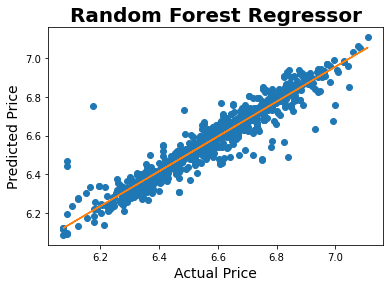

In [157]:
res=pd.DataFrame()
res['Actual']=(y_test)
res['Predict']=(rfr1.predict(x_test))



x=y_test
y=rfr1.predict(x_test)

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Random Forest Regressor',fontdict={'fontweight':'bold','fontsize':20})